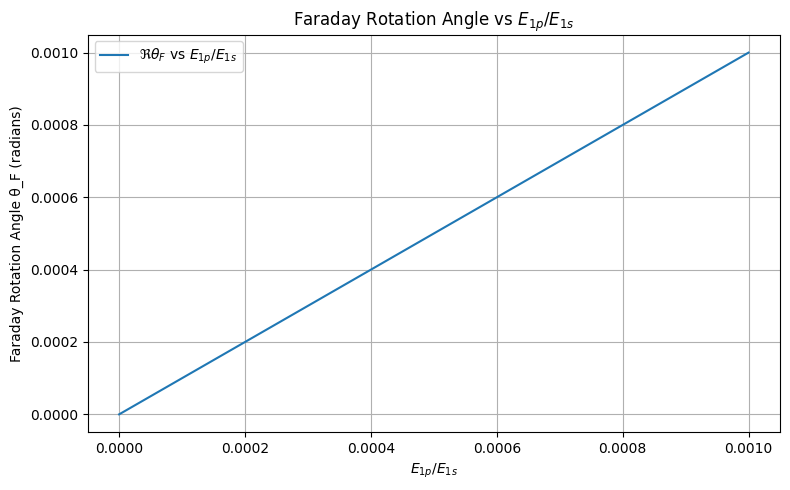

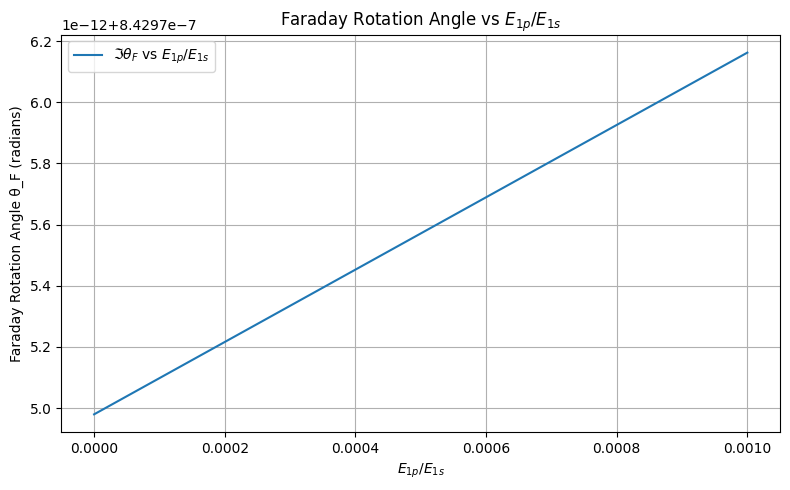

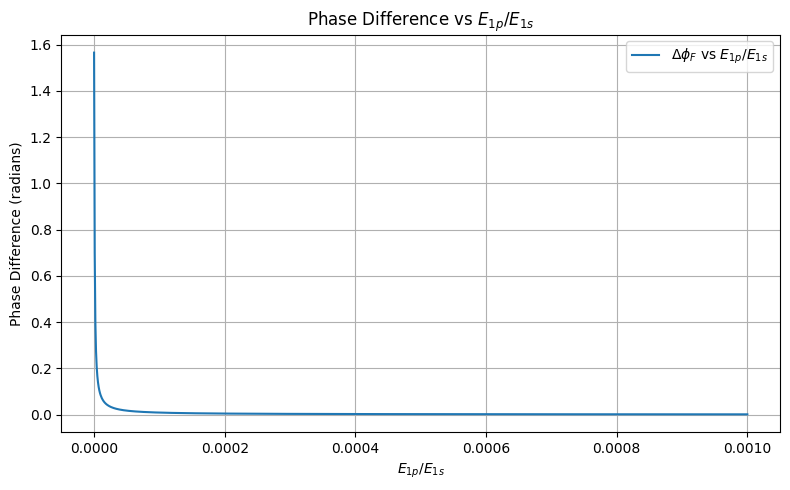

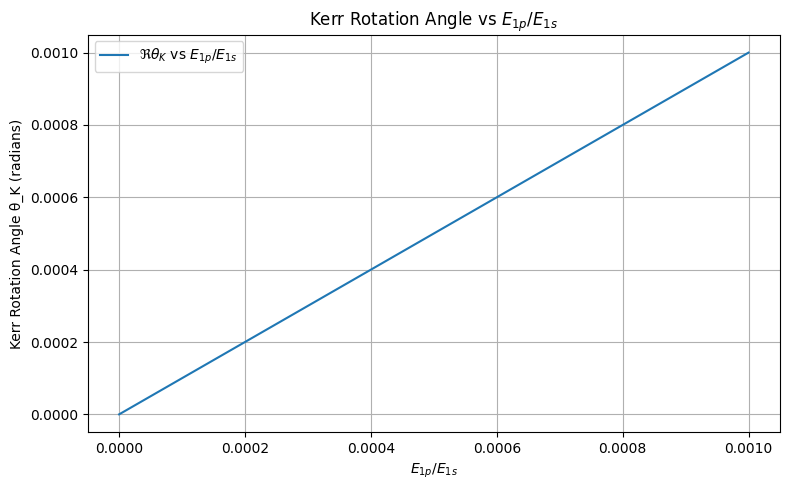

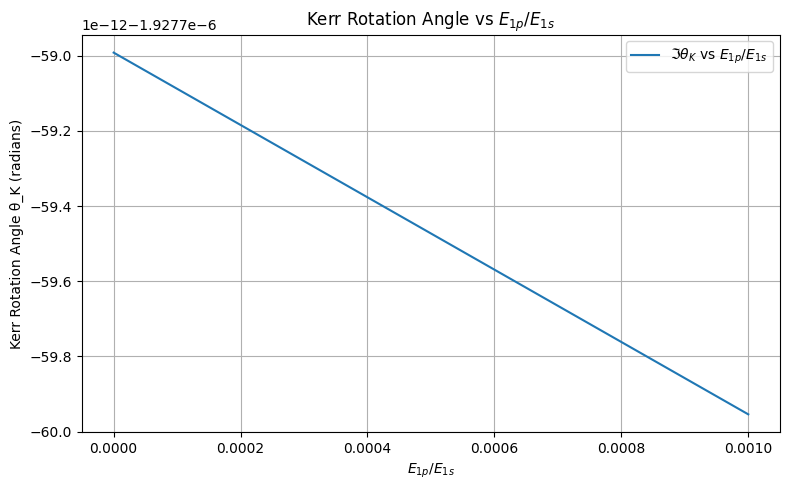

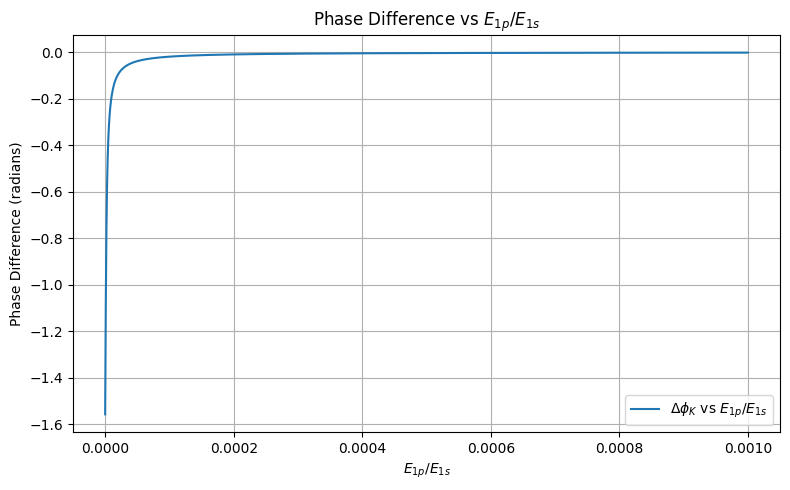

In [6]:
# This is the relation of rotation and incident angle. Notice the rotation angles include initial incident polarization.
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d = 1e-8
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5
sigma_xx_b = 0
sigma_xx_t = 0
theta = 1e-3

k_range = np.linspace(0, 1e-3, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_f_list = []
theta_K_real_list = []
theta_K_imag_list = []
phase_diff_k_list = []

for k in k_range:
    x1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    x2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    x3 = np.cos(theta)
    x4 = 2 * a * sigma_xx_b
    x5 = 2 * a * sigma_xy_b
    x6 = 2 * a * sigma_xy_t
    x7 = (n1 * x2 + n2 * x1 + x4 * x1 * x2) * (n1 * x1 + n2 * x2 + x4) + x5**2 * x1 * x2
    x9 = 2 * a * sigma_xx_t
    x8 = (n2 * x3 + n3 * x2 + x9 * x2 * x3) * (n2 * x2 + n3 * x3 + x9) + x6**2 * x2 * x3

    T12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7]
    ])

    T21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7]
    ])

    R21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7 - 1, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7 - 1]
    ])
    
    R12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7 - 1, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7 - 1]
    ])

    T23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8]
    ])

    R23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8 - 1, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8 - 1]
    ])

    delta = k0 * d * x2 * n2
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, k * x1])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_f = T23 @ inverse_term @ T12 @ E_incident
    E_k = (R12 + T21 @ R23 @ (exp_2idelta * inverse_term) @ T12) @ E_incident

    theta_F_real = np.arctan(E_f[1] / (E_f[0] * x3)).real
    theta_F_imag = np.arctan(E_f[1] / (E_f[0] * x3)).imag
    phase_diff_f = np.arctan((E_f[1] / (E_f[0] * x3)).imag / (E_f[1] / (E_f[0] * x3)).real)
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_f_list.append(phase_diff_f)
    theta_K_real = np.arctan(E_k[1] / (E_k[0] * x1)).real
    theta_K_imag = np.arctan(E_k[1] / (E_k[0] * x1)).imag
    phase_diff_k = np.arctan((E_k[1] / (E_k[0] * x1)).imag / (E_k[1] / (E_k[0] * x1)).real)
    theta_K_real_list.append(theta_K_real)
    theta_K_imag_list.append(theta_K_imag)
    phase_diff_k_list.append(phase_diff_k)

plt.figure(figsize=(8, 5))
plt.plot(k_range, theta_F_real_list, label=r'$\Re\theta_F$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_range, phase_diff_f_list, label=r'$\Delta\phi_F$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_range, theta_K_real_list, label=r'$\Re\theta_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_range, phase_diff_k_list, label=r'$\Delta\phi_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

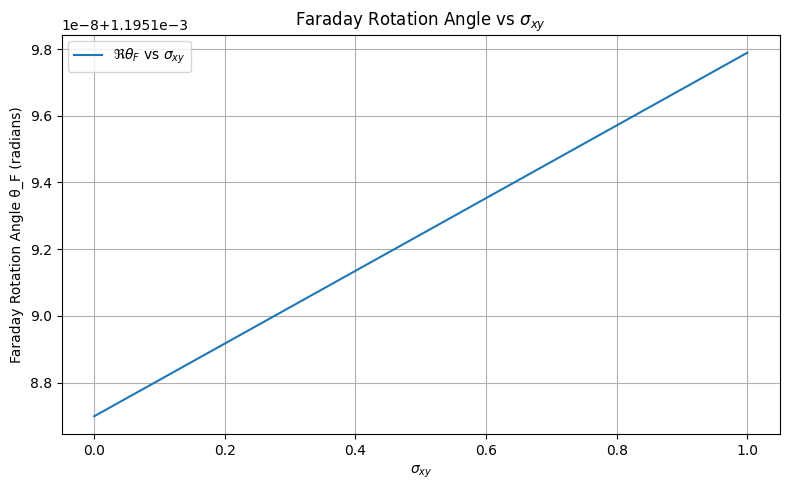

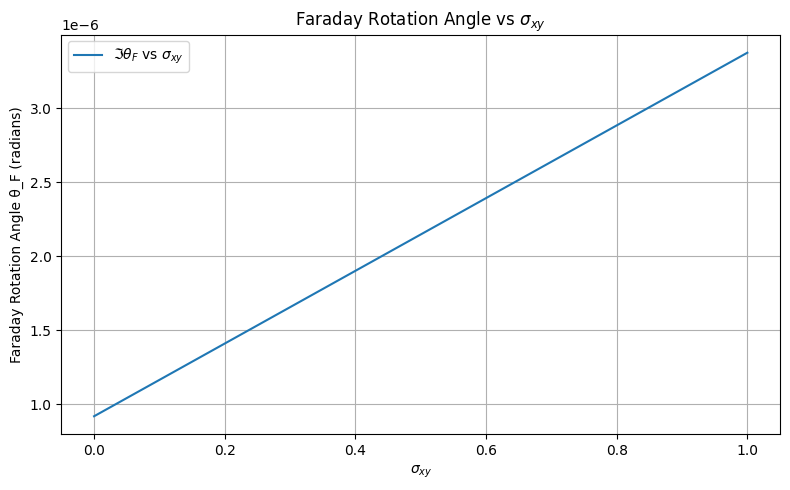

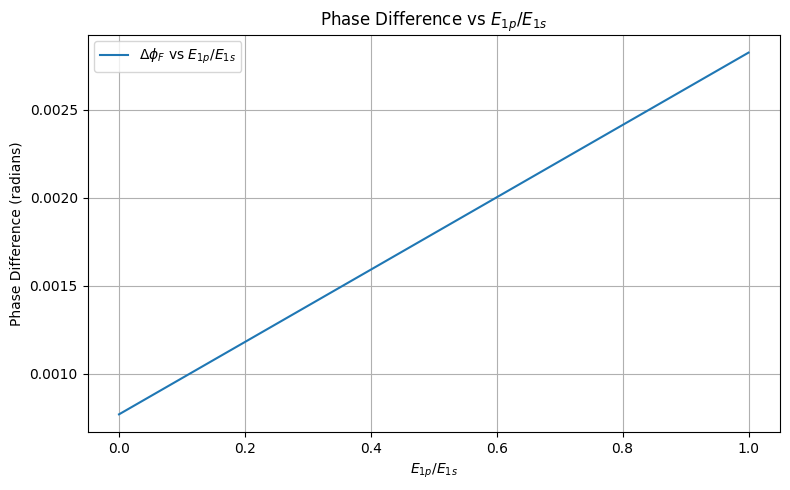

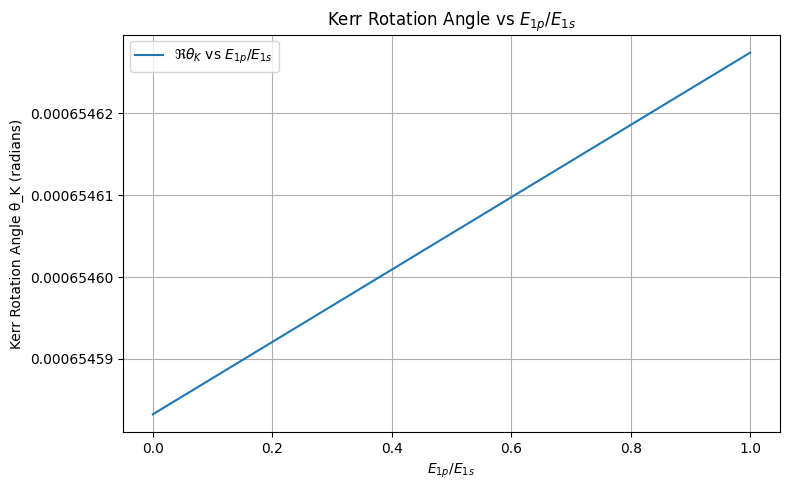

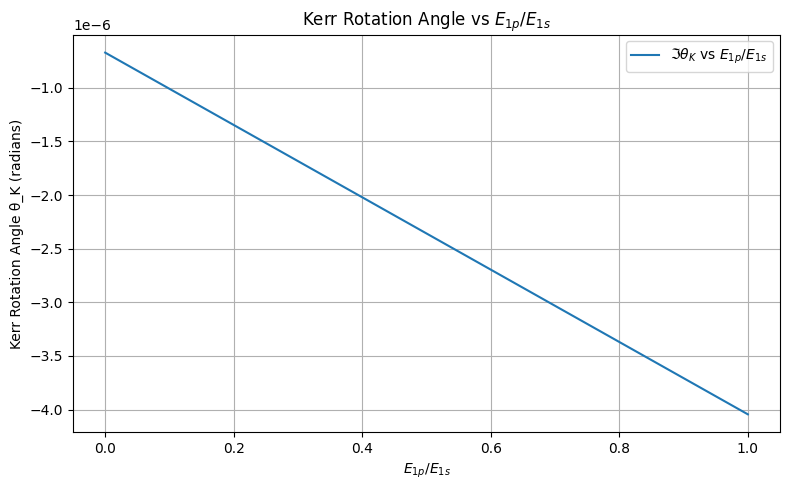

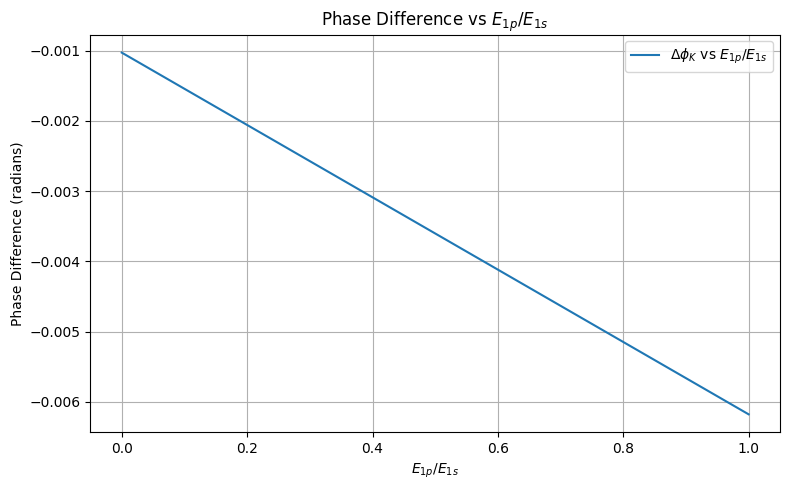

In [5]:
# This is the relation of rotation and sigma_xy. Notice the rotation angles include initial incident polarization.
import numpy as np
import matplotlib.pyplot as plt
import warnings

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d = 1e-8
a = 7.29735e-3
theta = np.pi / 4
k = 0.001

sigma_range = np.linspace(0, 1, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_f_list = []
theta_K_real_list = []
theta_K_imag_list = []
phase_diff_k_list = []

for sigma in sigma_range:
    sigma_xy_b = -sigma
    sigma_xy_t = sigma
    sigma_xx_b = 0
    sigma_xx_t = 0
    x1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    x2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    x3 = np.cos(theta)
    x4 = 2 * a * sigma_xx_b
    x5 = 2 * a * sigma_xy_b
    x6 = 2 * a * sigma_xy_t
    x7 = (n1 * x2 + n2 * x1 + x4 * x1 * x2) * (n1 * x1 + n2 * x2 + x4) + x5**2 * x1 * x2
    x9 = 2 * a * sigma_xx_t
    x8 = (n2 * x3 + n3 * x2 + x9 * x2 * x3) * (n2 * x2 + n3 * x3 + x9) + x6**2 * x2 * x3

    T12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7]
    ])

    T21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7]
    ])

    R21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7 - 1, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7 - 1]
    ])
    
    R12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7 - 1, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7 - 1]
    ])

    T23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8]
    ])

    R23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8 - 1, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8 - 1]
    ])

    delta = k0 * d * x2 * n2
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, k * x1])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_f = T23 @ inverse_term @ T12 @ E_incident
    E_k = (R12 + T21 @ R23 @ (exp_2idelta * inverse_term) @ T12) @ E_incident

    theta_F_real = np.arctan(E_f[1] / (E_f[0] * x3)).real
    theta_F_imag = np.arctan(E_f[1] / (E_f[0] * x3)).imag
    phase_diff_f = np.arctan((E_f[1] / (E_f[0] * x3)).imag / (E_f[1] / (E_f[0] * x3)).real)
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_f_list.append(phase_diff_f)
    theta_K_real = np.arctan(E_k[1] / (E_k[0] * x1)).real
    theta_K_imag = np.arctan(E_k[1] / (E_k[0] * x1)).imag
    phase_diff_k = np.arctan((E_k[1] / (E_k[0] * x1)).imag / (E_k[1] / (E_k[0] * x1)).real)
    theta_K_real_list.append(theta_K_real)
    theta_K_imag_list.append(theta_K_imag)
    phase_diff_k_list.append(phase_diff_k)

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, theta_F_real_list, label=r'$\Re\theta_F$ vs $\sigma_{xy}$')
plt.xlabel("$\sigma_{xy}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs $\sigma_{xy}$')
plt.xlabel("$\sigma_{xy}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, phase_diff_f_list, label=r'$\Delta\phi_F$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, theta_K_real_list, label=r'$\Re\theta_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma_range, phase_diff_k_list, label=r'$\Delta\phi_K$ vs $E_{1p}/E_{1s}$')
plt.xlabel("$E_{1p}/E_{1s}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs $E_{1p}/E_{1s}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

warnings.filterwarnings('ignore')